In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import xgboost as xgb
from sklearn import metrics
from mlxtend import evaluate
from mlxtend import plotting


In [2]:
train_df = pd.read_csv(r"C:\Users\Monisha\Downloads\archive (1)\UNSW_NB15_training-set.csv")
test_df = pd.read_csv(r"C:\Users\Monisha\Downloads\archive (1)\UNSW_NB15_testing-set.csv")

In [3]:
train_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [4]:
train_df.isna().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [5]:
train_df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [6]:
len(train_df.columns)

45

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [8]:
train_df.attack_cat.unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

<AxesSubplot:>

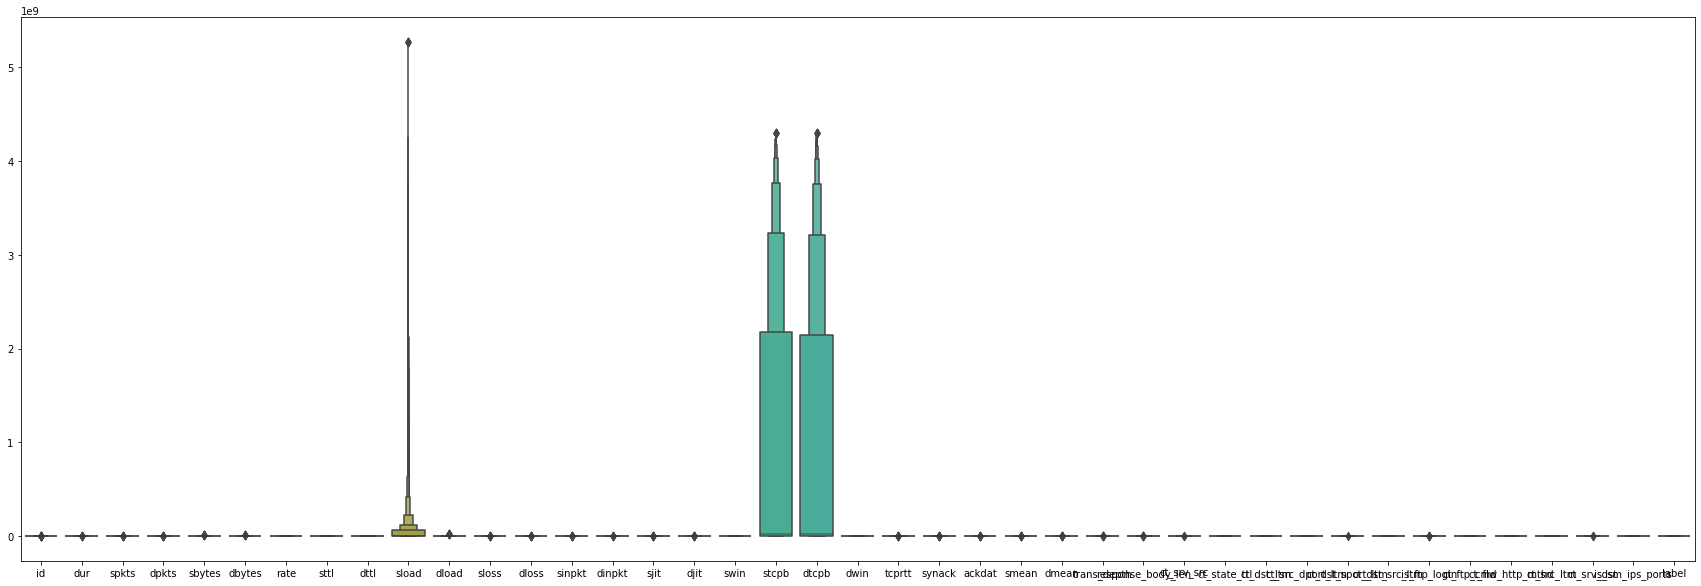

In [9]:
plt.figure(figsize=(30,10))
sns.boxenplot(data=train_df)

In [10]:
train_df[train_df.columns[train_df.dtypes==object]].head()

,proto,service,state,attack_cat
0,udp,-,INT,Normal
1,udp,-,INT,Normal
2,udp,-,INT,Normal
3,udp,-,INT,Normal
4,udp,-,INT,Normal


In [12]:
train_df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [13]:
train_df[train_df.columns[train_df.dtypes != object]].head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,...,1,1,2,0,0,0,1,2,0,0
1,2,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,...,1,1,2,0,0,0,1,2,0,0
2,3,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,...,1,1,3,0,0,0,1,3,0,0
3,4,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,...,2,1,3,0,0,0,2,3,0,0
4,5,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,...,2,1,3,0,0,0,2,3,0,0


In [14]:
train_df.label.value_counts()

1    45332
0    37000
Name: label, dtype: int64

In [15]:
len(train_df)

82332

In [16]:
train_df = train_df.drop(['attack_cat'],axis=1)

In [17]:
train_df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

In [18]:
train_df[train_df.columns[train_df.dtypes==object]].head()

,proto,service,state
0,udp,-,INT
1,udp,-,INT
2,udp,-,INT
3,udp,-,INT
4,udp,-,INT


In [19]:
train_df.service.value_counts()

-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: service, dtype: int64

In [21]:
train_df.service.value_counts()['-']/len(train_df)

0.5727177768061021

In [22]:
train_df.proto.unique()

array(['udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip',
       'ipnip', 'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2',
       'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'netblt', 'mfe-nsp',
       'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6',
       'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd',
       'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts',
       'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn',
       'pvp', 'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines',
       'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp',
       'ax.25', 'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp',
       'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp', 'bna',
       'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep',
       'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas', 'fc', 'iso-ip',


In [23]:
train_df.state.unique()

array(['INT', 'FIN', 'REQ', 'ACC', 'CON', 'RST', 'CLO'], dtype=object)

In [24]:
encoder = LabelEncoder()

In [25]:
train_df.service = encoder.fit_transform(train_df.service)


In [26]:
train_df.service.value_counts()

0     47153
2     21367
5      8287
9      1851
3      1552
4      1396
7       423
11      204
12       30
10       29
1        26
8         9
6         5
Name: service, dtype: int64

In [27]:
train_df.state.value_counts()

FIN    39339
INT    34163
CON     6982
REQ     1842
ACC        4
RST        1
CLO        1
Name: state, dtype: int64

In [28]:
train_df.state = encoder.fit_transform(train_df.state)

In [29]:
train_df.state.value_counts()

3    39339
4    34163
2     6982
5     1842
0        4
6        1
1        1
Name: state, dtype: int64

In [30]:
train_df[train_df.columns[train_df.dtypes == object]].head()

,proto
0,udp
1,udp
2,udp
3,udp
4,udp


In [31]:
train_df.proto.value_counts()

tcp           43095
udp           29418
unas           3515
arp             987
ospf            676
              ...  
br-sat-mon       32
pvp              32
wsn              32
ib               31
igmp             30
Name: proto, Length: 131, dtype: int64

In [32]:
train_df.proto = train_df.proto.replace(train_df.proto.value_counts())

In [33]:
train_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.000011,29418,0,4,2,0,496,0,90909.0902,...,1,1,2,0,0,0,1,2,0,0
1,2,0.000008,29418,0,4,2,0,1762,0,125000.0003,...,1,1,2,0,0,0,1,2,0,0
2,3,0.000005,29418,0,4,2,0,1068,0,200000.0051,...,1,1,3,0,0,0,1,3,0,0
3,4,0.000006,29418,0,4,2,0,900,0,166666.6608,...,2,1,3,0,0,0,2,3,0,0
4,5,0.000010,29418,0,4,2,0,2126,0,100000.0025,...,2,1,3,0,0,0,2,3,0,0


In [34]:
features = train_df.drop(['label'],axis=1)

In [35]:
target = train_df.label

<AxesSubplot:>

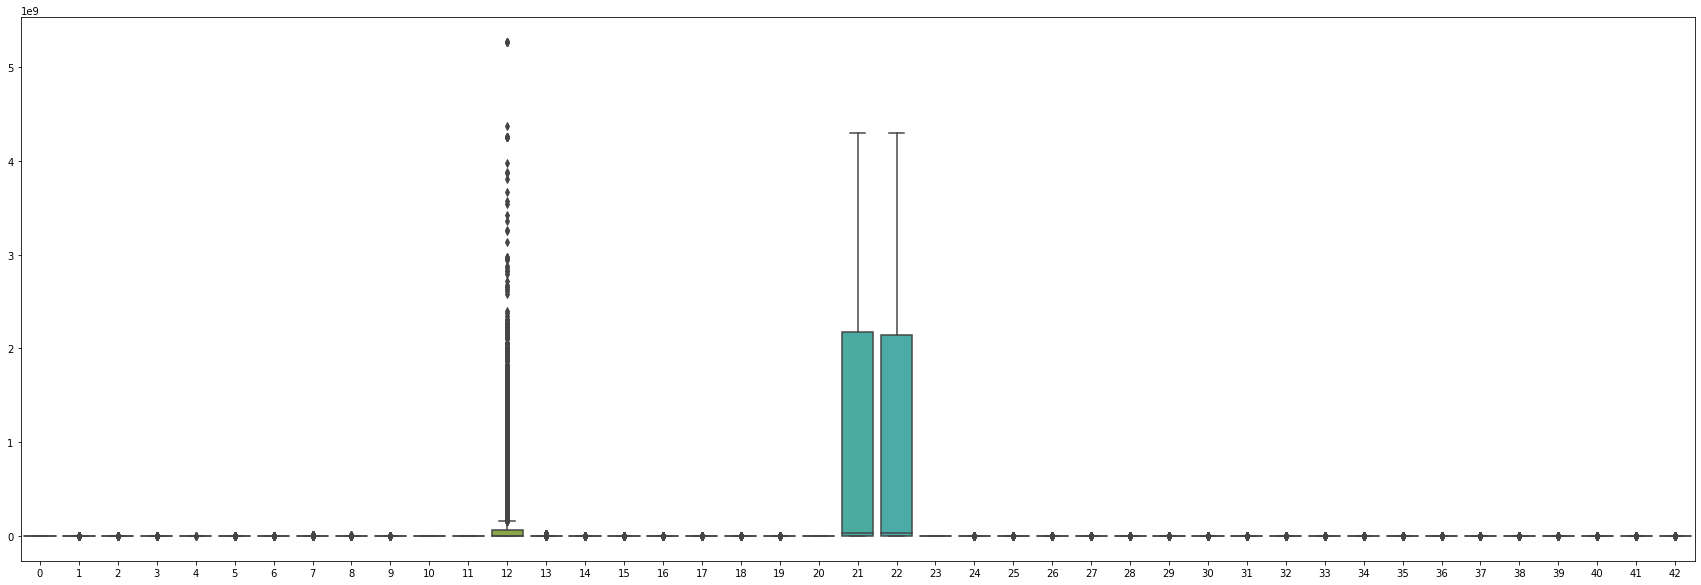

In [36]:
plt.figure(figsize = (30,10))
sns.boxplot(data = np.array(features))

In [37]:
scalar = MinMaxScaler()

In [41]:
features_scaled = scalar.fit_transform(features)

In [42]:
features_scaled_df = pd.DataFrame(features_scaled,columns=train_df.drop(['label'],axis =1).columns)

In [43]:
features_scaled_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.000000,1.833334e-07,0.68241,0.0,0.666667,0.000094,0.0,0.000033,0.0,0.090909,...,0.000000,0.000000,0.0,0.016129,0.0,0.0,0.0,0.000000,0.016393,0.0
1,0.000012,1.333334e-07,0.68241,0.0,0.666667,0.000094,0.0,0.000121,0.0,0.125000,...,0.000000,0.000000,0.0,0.016129,0.0,0.0,0.0,0.000000,0.016393,0.0
2,0.000024,8.333335e-08,0.68241,0.0,0.666667,0.000094,0.0,0.000073,0.0,0.200000,...,0.000000,0.000000,0.0,0.032258,0.0,0.0,0.0,0.000000,0.032787,0.0
3,0.000036,1.000000e-07,0.68241,0.0,0.666667,0.000094,0.0,0.000061,0.0,0.166667,...,0.017241,0.017241,0.0,0.032258,0.0,0.0,0.0,0.016949,0.032787,0.0
4,0.000049,1.666667e-07,0.68241,0.0,0.666667,0.000094,0.0,0.000146,0.0,0.100000,...,0.017241,0.017241,0.0,0.032258,0.0,0.0,0.0,0.016949,0.032787,0.0


<AxesSubplot:>

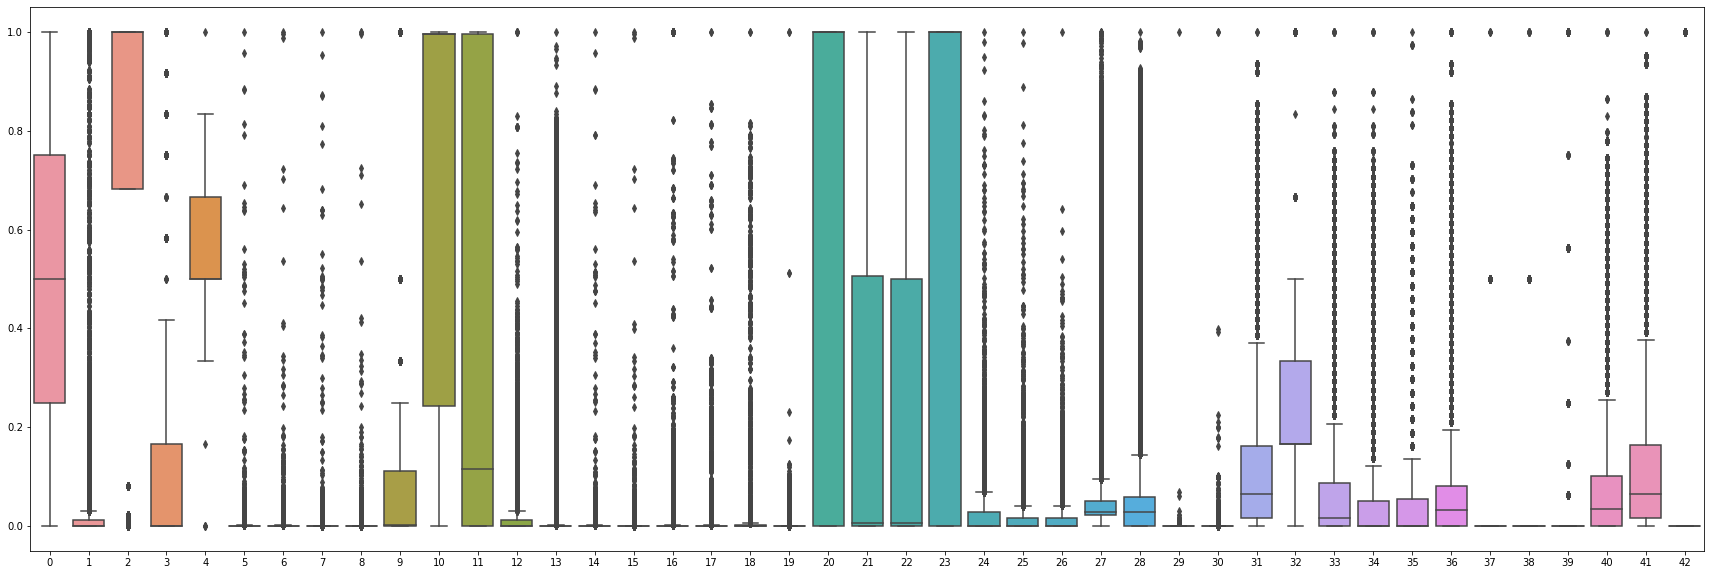

In [45]:
plt.figure(figsize = (30,10))
sns.boxplot(data = features_scaled)

In [46]:
features_scaled_df = features_scaled_df.drop(['id'],axis=1)

In [47]:
rf_base_model = RandomForestClassifier()

In [48]:
len(features_scaled)

82332

In [49]:
rf_base_model.fit(features_scaled_df,target)

RandomForestClassifier()

In [ ]:
rfe = RFE(rf_base_model,15)
rfe = rfe.fit(features_scaled_df,target)

In [51]:
list(zip(features_scaled_df.columns,rfe.support_,rfe.ranking_))

[('dur', True, 1),
 ('proto', True, 1),
 ('service', False, 7),
 ('state', False, 9),
 ('spkts', False, 17),
 ('dpkts', False, 6),
 ('sbytes', True, 1),
 ('dbytes', True, 1),
 ('rate', True, 1),
 ('sttl', True, 1),
 ('dttl', False, 4),
 ('sload', True, 1),
 ('dload', False, 3),
 ('sloss', False, 12),
 ('dloss', False, 14),
 ('sinpkt', True, 1),
 ('dinpkt', False, 11),
 ('sjit', False, 8),
 ('djit', False, 13),
 ('swin', False, 22),
 ('stcpb', False, 19),
 ('dtcpb', False, 21),
 ('dwin', False, 26),
 ('tcprtt', True, 1),
 ('synack', False, 5),
 ('ackdat', False, 10),
 ('smean', True, 1),
 ('dmean', False, 2),
 ('trans_depth', False, 24),
 ('response_body_len', False, 20),
 ('ct_srv_src', True, 1),
 ('ct_state_ttl', True, 1),
 ('ct_dst_ltm', False, 15),
 ('ct_src_dport_ltm', False, 18),
 ('ct_dst_sport_ltm', True, 1),
 ('ct_dst_src_ltm', True, 1),
 ('is_ftp_login', False, 28),
 ('ct_ftp_cmd', False, 27),
 ('ct_flw_http_mthd', False, 23),
 ('ct_src_ltm', False, 16),
 ('ct_srv_dst', True, 

In [96]:
col = features_scaled_df.columns[rfe.support_]
col 

Index(['dur', 'proto', 'sbytes', 'dbytes', 'rate', 'sttl', 'sload', 'sinpkt',
       'tcprtt', 'smean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'ct_srv_dst'],
      dtype='object')

In [99]:
features_scaled_rfe = features_scaled_df[col]

In [100]:
len(features_scaled_rfe)

82332

In [101]:
len(features_scaled_df)

82332

In [102]:
features_scaled_rfe.head()

,dur,proto,sbytes,dbytes,rate,sttl,sload,sinpkt,tcprtt,smean,ct_srv_src,ct_state_ttl,ct_dst_sport_ltm,ct_dst_src_ltm,ct_srv_dst
0,1.833334e-07,0.68241,0.000033,0.0,0.090909,0.996078,0.034238,1.833028e-07,0.0,0.151351,0.016129,0.333333,0.0,0.016129,0.016393
1,1.333334e-07,0.68241,0.000121,0.0,0.125000,0.996078,0.167236,1.333111e-07,0.0,0.579054,0.016129,0.333333,0.0,0.016129,0.016393
2,8.333335e-08,0.68241,0.000073,0.0,0.200000,0.996078,0.162187,8.331946e-08,0.0,0.344595,0.032258,0.333333,0.0,0.032258,0.032787
3,1.000000e-07,0.68241,0.000061,0.0,0.166667,0.996078,0.113895,9.998335e-08,0.0,0.287838,0.032258,0.333333,0.0,0.032258,0.032787
4,1.666667e-07,0.68241,0.000146,0.0,0.100000,0.996078,0.161427,1.666389e-07,0.0,0.702027,0.032258,0.333333,0.0,0.032258,0.032787


<AxesSubplot:>

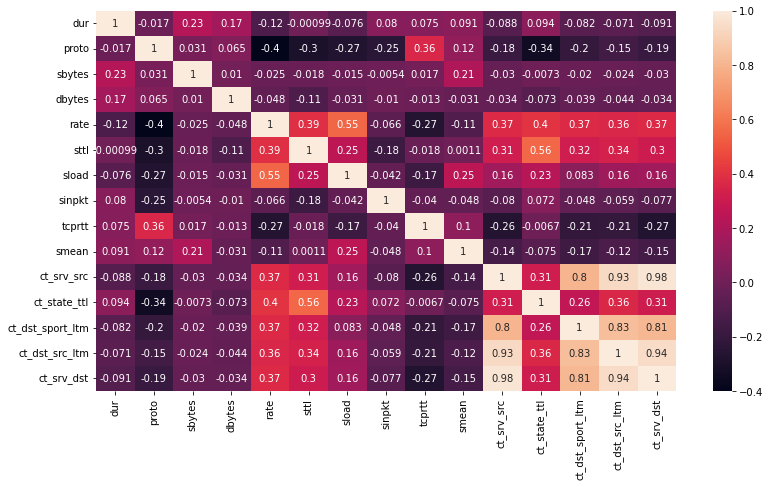

In [103]:
plt.figure(figsize=(13,7))
sns.heatmap(features_scaled_rfe.corr(),annot = True)

In [105]:
vif = pd.DataFrame()
X = features_scaled_rfe
vif['Features']=features_scale_rfe.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
14,ct_srv_dst,41.58
10,ct_srv_src,37.80
13,ct_dst_src_ltm,13.77
5,sttl,5.94
11,ct_state_ttl,4.64
12,ct_dst_sport_ltm,4.33
1,proto,3.45
4,rate,2.67
6,sload,1.99
9,smean,1.68


In [106]:
features_scaled_rfe=features_scaled_rfe.drop(['ct_srv_src'],axis=1)

In [107]:
vif=pd.DataFrame()
X=features_scaled_rfe
vif['Features']=features_scaled_rfe.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
13,ct_srv_dst,13.78
12,ct_dst_src_ltm,13.42
5,sttl,5.92
10,ct_state_ttl,4.64
11,ct_dst_sport_ltm,4.33
1,proto,3.42
4,rate,2.67
6,sload,1.99
9,smean,1.68
8,tcprtt,1.58


In [108]:
X_train,X_test,Y_train,Y_test = train_test_split(features_scaled_rfe,target)

In [109]:
rf_base_model = RandomForestClassifier()

In [110]:
rf_base_model.fit(X_train,Y_train)

RandomForestClassifier()

In [111]:
predictions = rf_base_model.predict(X_test)

In [112]:
metrics.accuracy_score(Y_test,predictions)

0.9715299033182724

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

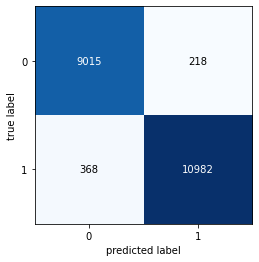

In [113]:
plotting.plot_confusion_matrix(evaluate.confusion_matrix(Y_test,predictions))

In [114]:
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9233
           1       0.98      0.97      0.97     11350

    accuracy                           0.97     20583
   macro avg       0.97      0.97      0.97     20583
weighted avg       0.97      0.97      0.97     20583



Text(0.5, 0, 'false positive rate')

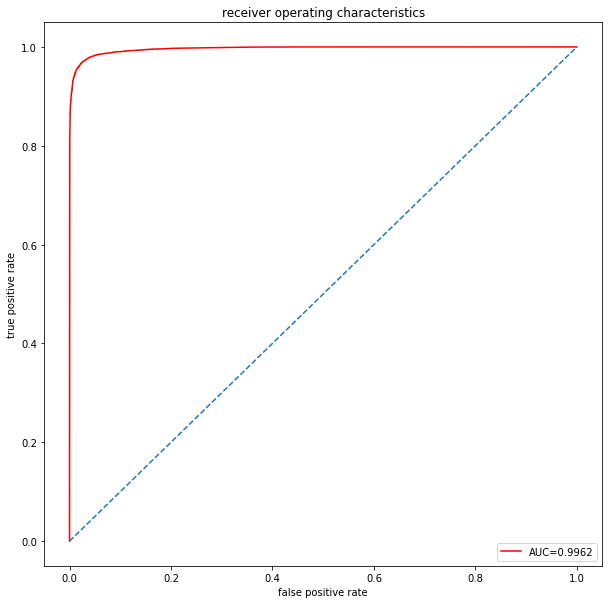

In [115]:
result_proba_rf = rf_base_model.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds = roc_curve(Y_test,result_proba_rf)
roc_auc = auc(false_positive_rate,true_positive_rate)

plt.figure(figsize=(10,10))
plt.title('receiver operating characteristics')
plt.plot(false_positive_rate,true_positive_rate,color='red',label='AUC=%0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--')
plt.axis('tight')
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')


In [116]:
test_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,79946,0,2,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,79946,0,2,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,79946,0,2,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,79946,3,2,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,79946,0,2,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
